In [1]:
import numpy as np

In [1]:
d = {}

In [3]:
keys = ['fast_mode', 'alfven_mode', 'acoustic_mode']

In [9]:
d = dict.fromkeys(keys)

In [10]:
d

{'fast_mode': None, 'alfven_mode': None, 'acoustic_mode': None}

In [14]:
for key in d.keys():
    d[key] = np.full((5), np.nan)

In [15]:
d['fast_mode']

array([nan, nan, nan, nan, nan])

In [11]:
d.keys()

dict_keys(['fast_mode', 'alfven_mode', 'acoustic_mode'])

In [4]:
a = np.arange(10)

In [5]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
hasattr(a, 'len')

False

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [103]:
def two_fluid_dispersion_solution(n, B, T_i, theta, k, m_e=None, m_i=None, T_e=None, gamma_e=3., gamma_i=3):

    r"""
    Equation 34 of Bellan2012 (doi:10.1029/2012JA017856)

    .. math::
    \zeta^3 - A\zeta^2 + B\zeta - C = 0

    """

    if ((n is None) or (n <= 0)):
        raise ValueError("Number density must be a positive real number")

    #if ((T_e is None) or (T_e <= 0)):
    #    raise ValueError("Electron temperature must be a positive real number")

    if ((T_i is None) or (T_i <= 0)):
        raise ValueError("Ion temperature must be a positive real number")

    if (theta is None):
        raise ValueError("Propagation direction can't be None")

    if (T_e is None):
        T_e = T_i

    #if ((k is None) or (k <= 0)):
    #    raise ValueError("Wave number must be a positive real number")

    # The required physcial constants
    gamma_sigma = 1
    m_i  = 1.672622E-24
    m_e  = 9.109384E-28
    mu_0 = 1
    e    = 4.8032E-10
    c    = 2.99792458E10
    k_B  = 1.3807E-16

    # Required derived parameters
    c_s = np.sqrt(gamma_sigma * k_B * (T_i + T_e) / m_i)
    v_A = np.sqrt(B**2/(mu_0 * n * m_i))
    omega_ci = e * B/(c * m_i)
    omega_pe = np.sqrt((mu_0 * n * e**2)/m_e)

    alpha = np.cos(theta)**2
    beta = c_s**2/v_A**2
    Lambda = k**2 * v_A**2/omega_ci**2

    Q = 1 + k**2 * c**2/omega_pe**2

    A = (Q + Q**2 * beta + Q * alpha + alpha * Lambda)/Q**2
    B = alpha * (1 + 2 * Q * beta + Lambda * beta)/Q**2
    C = alpha**2 * beta/Q**2

    p = (3 * B - A**2)/3
    q = (9 * A * B - 2 * A**3 - 27 * C)/27


    keys = ['fast_mode', 'alfven_mode', 'acoustic_mode']
    zeta_sol = dict.fromkeys(keys)
    omega    = dict.fromkeys(keys)

    for (j,key) in zip(range(3), keys):

        # The solution corresponding to equation 37
        zeta_sol[key] = 2 * np.sqrt(-p/3) * np.cos(1/3 * np.arccos(3 * q/(2 * p)
        * np.sqrt(-3/p)) - 2 * np.pi/3 * j) + A/3

        # The solution corresponding to equation 38
        omega[key] = omega_ci * np.sqrt(2 * Lambda * np.sqrt(-p/3)
        * np.cos(1/3 * np.arccos(3 * q/(2 * p) * np.sqrt(-3/p)) - 2 * np.pi/3 * j) + Lambda * A/3)

    #omega = np.sqrt(k**2 * v_A**2 * zeta_sol)

    return omega, v_A, beta, c_s, omega_ci

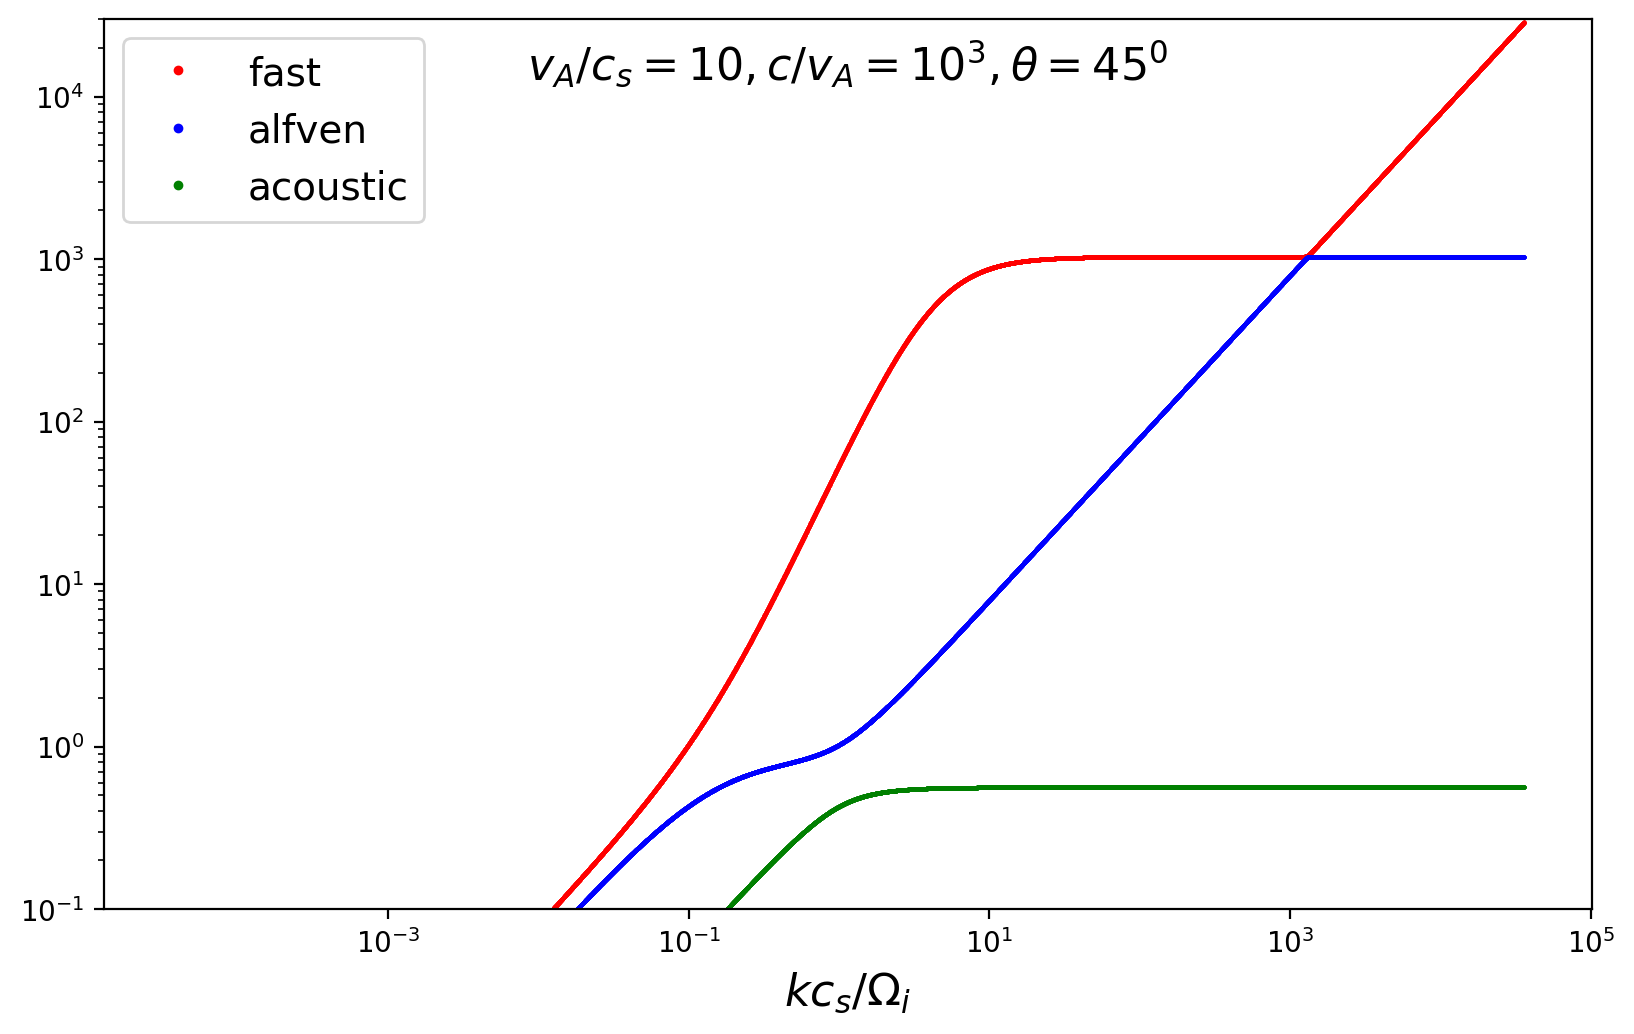

In [104]:
k = np.logspace(-11, -2, 1E4)
c = 3E10 # Speed of light in cm/sec
theta = np.pi/4
omega, v_A, beta, c_s, omega_ci = two_fluid_dispersion_solution(n=5, B=8.3e-5, T_i=5.e4, theta=theta, k=k)

omega_fast     = omega['fast_mode']
omega_alfven   = omega['alfven_mode']
omega_acoustic = omega['acoustic_mode']

k_prime = k * c_s/omega_ci

fig = plt.figure( num=None, figsize=(8, 5), dpi=200, facecolor='w', edgecolor='gray' )
fig.subplots_adjust( left=0.05, right=0.98, top=0.94, bottom=0.05, 
wspace=0., hspace=0. )

axs = fig.add_subplot( 1, 1, 1 )
axs.plot(k_prime, omega_fast, 'r.', ms=1, label='fast')
axs.plot(k_prime, omega_alfven, 'b.', ms=1, label='alfven')
axs.plot(k_prime, omega_acoustic, 'g.', ms=1, label='acoustic')
axs.set_yscale('log')
axs.set_xscale('log')
axs.set_ylim(1.e-1, 3.e4)
text = f'$v_A/c_s = {v_A/c_s:.0f}, c/v_A = 10^{np.log10(c/v_A):.0f}, \\theta = {theta*180/np.pi:.0f}^0$'
axs.text(0.5,0.95, text, horizontalalignment='center', verticalalignment='center', transform=axs.transAxes, fontsize=16)
axs.set_xlabel(r'$kc_s/\Omega_i$', fontsize=16)
axs.legend(loc='best', markerscale=5, fontsize=14)
plt.show()

#print('omega_fast=%s,%s' %(np.nanmin(omega_fast), np.nanmax(omega_fast)))
#print('omega_alfven=%s,%s' %(np.nanmin(omega_alfven), np.nanmax(omega_alfven)))
#print('omega_acoustic=%s,%s' %(np.nanmin(omega_acoustic), np.nanmax(omega_acoustic)))


In [110]:
c_s/1.e5

28.7310011844849

In [26]:
print(f'$v_A/c_s = {v_A/c_s:.0f}, c/v_A = 10^{np.log10(c/v_A):2.0f}, \\theta = {theta*180/np.pi:.0f}$')

$v_A/c_s = 10, c/v_A = 10^ 3, \theta = 45$


In [32]:
from astropy import units as u

In [78]:
v = 1.e4 * u.m

In [71]:
v.to(u.K, equivalencies=u.temperature_energy())

<Quantity 1.16045221e+08 K>

In [74]:
v.to(u.K, equivalencies=u.temperature_energy())

<Quantity 1.16045221e+08 K>

In [79]:
v.unit == 'm'

True

In [80]:
import plasmapy.formulary.parameters as pfp

In [92]:
pfp.Alfven_speed( B, n, ion).to(u.km/u.s)

<Quantity 146.27974879 km / s>

In [135]:
B = 8 * u.nT
n = 5 * u.cm ** -3
z = 1
T_i = 1.e4 * u.K
gamma_e = 1
gamma_i = 3
ion='p'
pfp.ion_sound_speed(T_e=40*T_i, T_i=T_i, ion='p').to(u.km/u.s)

<Quantity 59.57676322 km / s>

In [161]:
import astropy.units as u
import numpy as np

from astropy.constants.si import c, e, k_B, m_e, m_p, mu0

import plasmapy.formulary.parameters as pfp
import matplotlib.colors as colors

from plasmapy.utils.decorators import validate_quantities

from mpl_toolkits.axes_grid1 import make_axes_locatable


In [106]:
@validate_quantities(
    B={"can_be_negative": False},
    m_e={"can_be_negative": False},
    m_i={"can_be_negative": False},
    n={"can_be_negative": False},
    T_e={"can_be_negative": False, "equivalencies": u.temperature_energy()},
    T_i={"can_be_negative": False, "equivalencies": u.temperature_energy()},
    theta={"can_be_negative": True},
)
def two_fluid_dispersion_solution(
    B: u.T,
    k: u.m ** -1,
    n: u.m ** -3,
    T_e: u.K,
    T_i: u.K,
    gamma_e=1,
    gamma_i=3,
    ion="p+",
    m_e: u.kg = m_e,
    m_i: u.kg = m_p,
    theta: u.deg = 45 * u.deg,
    z=1
):

    # Required derived parameters
    c_s = pfp.ion_sound_speed(T_e=T_e, T_i=T_i, n_e=z * n, gamma_e =
    gamma_e, gamma_i = gamma_i, ion='p+')
    v_A = pfp.Alfven_speed( B, n, ion='p+')
    omega_ci = pfp.gyrofrequency(B=B, particle='p+', signed=False, Z=z)
    omega_pe = pfp.plasma_frequency(n=n, particle='e-', z_mean=z)

    alpha = (np.cos(theta.to('rad'))**2).value
    beta = (c_s**2/v_A**2).value

    alphav,kv = np.meshgrid(alpha,k)

    Lambda = (kv**2 * v_A**2/omega_ci**2).value

    Q = 1 + (kv**2 * c**2/omega_pe**2).value
    
    A = (Q + Q**2 * beta + Q * alphav + alphav * Lambda)/Q**2
    B = alphav * (1 + 2 * Q * beta + Lambda * beta)/Q**2
    C = alphav**2 * beta/Q**2

    p = (3 * B - A**2)/3
    q = (9 * A * B - 2 * A**3 - 27 * C)/27


    keys = ['fast_mode', 'alfven_mode', 'acoustic_mode']
    omega    = dict.fromkeys(keys)

    for (j,key) in zip(range(3), keys):

        # The solution corresponding to equation 38
        omega[key] = omega_ci * np.sqrt(2 * Lambda * np.sqrt(-p/3)
        * np.cos(1/3 * np.arccos(3 * q/(2 * p) * np.sqrt(-3/p)) - 2 * np.pi/3
        * j) + Lambda * A/3)

    return omega

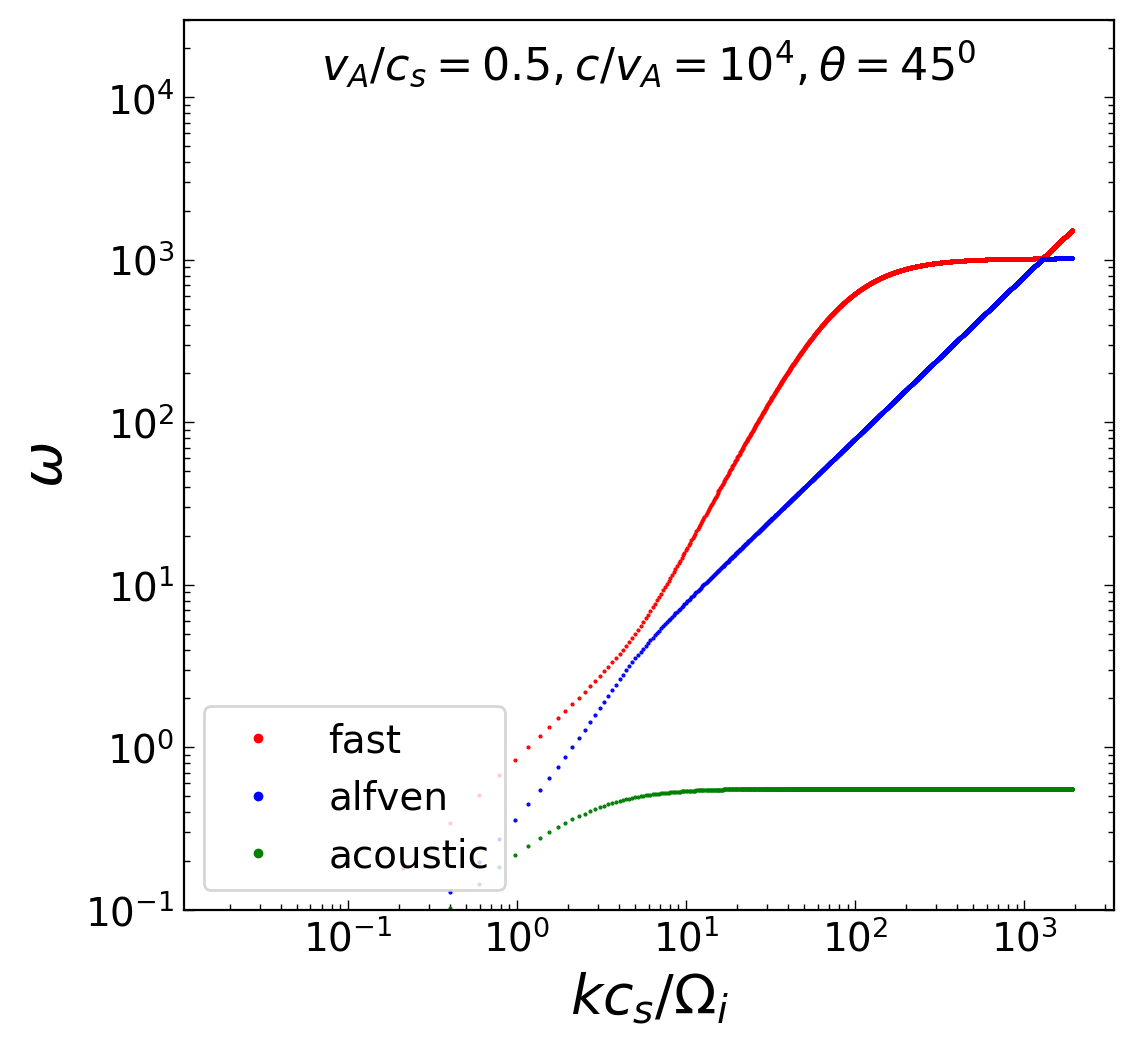

In [226]:
k = np.linspace(10**-7, 10**-2, 1E4) * u.m ** -1
theta = np.linspace(5, 85, 100) * u.deg
n = 5 * u.cm ** -3
B = 8.3E-9 * u.T
T_e = 1.6e6 * u.K
T_i = 4.e5 * u.K
z = 1
c = 3.e8 * u.m/u.s
c_s = pfp.ion_sound_speed(T_e=T_e, T_i=T_i, n_e=z * n)
v_A = pfp.Alfven_speed( B, n, ion='p+')
omega_ci = pfp.gyrofrequency(B=B, particle='p+', signed=False, Z=z)

omega = two_fluid_dispersion_solution(n=n, B=B, T_e=T_e, T_i=T_i, theta=theta, z=z, k=k)

ind = 50
omega_fast     = omega['fast_mode'][:,ind]
omega_alfven   = omega['alfven_mode'][:,ind]
omega_acoustic = omega['acoustic_mode'][:,ind]

k_prime = k * c_s/omega_ci

fig = plt.figure( num=None, figsize=(5, 5), dpi=200, facecolor='w', edgecolor='gray' )
fig.subplots_adjust( left=0.05, right=0.98, top=0.94, bottom=0.05, 
wspace=0., hspace=0. )

axs = fig.add_subplot( 1, 1, 1 )
axs.plot(k_prime, omega_fast, 'r.', ms=1, label='fast')
axs.plot(k_prime, omega_alfven, 'b.', ms=1, label='alfven')
axs.plot(k_prime, omega_acoustic, 'g.', ms=1, label='acoustic')
axs.set_yscale('log')
axs.set_xscale('log')
axs.set_ylim(1.e-1, 3.e4)
text = f'$v_A/c_s = {v_A/c_s:.1f}, c/v_A = 10^{np.log10(c/v_A):.0f}, \\theta = {theta[ind].value:.0f}^0$'
axs.text(0.5,0.95, text, horizontalalignment='center', verticalalignment='center', transform=axs.transAxes, fontsize=16)
axs.set_xlabel(r'$kc_s/\Omega_i$', fontsize=20)
axs.set_ylabel(r'$\omega$', fontsize=20)

axs.get_xaxis().set_tick_params( which='both', direction='in',
labelbottom=True, bottom=True, width=.5, labelsize=14, 
labelrotation=0 )

axs.get_yaxis().set_tick_params( which='both', direction='in',
labelbottom=True, bottom=True, labelleft=True, left=True, labelright=False, right=True, width=.5, labelsize=14, labelrotation=0 )

axs.legend(loc=3, markerscale=5, fontsize=14)

In [231]:
k = np.linspace(10**-7, 10**-2, 1E4) * u.m ** -1
theta = np.linspace(5, 85, 100) * u.deg
n = 5 * u.cm ** -3
B = 8.3E-9 * u.T
T_e = 1.6e6 * u.K
T_i = 4.e5 * u.K
z = 1
c = 3.e8 * u.m/u.s
c_s = pfp.ion_sound_speed(T_e=T_e, T_i=T_i, n_e=z * n)
v_A = pfp.Alfven_speed( B, n, ion='p+')
omega_ci = pfp.gyrofrequency(B=B, particle='p+', signed=False, Z=z)

omega = two_fluid_dispersion_solution(n=n, B=B, T_e=T_e, T_i=T_i, theta=theta, z=z, k=k)

omega['fast_mode'][:,40]

<Quantity [1.61176289e-02, 1.77335308e-01, 3.38688540e-01, ...,
           1.52030163e+03, 1.52045355e+03, 1.52060547e+03] rad / s>

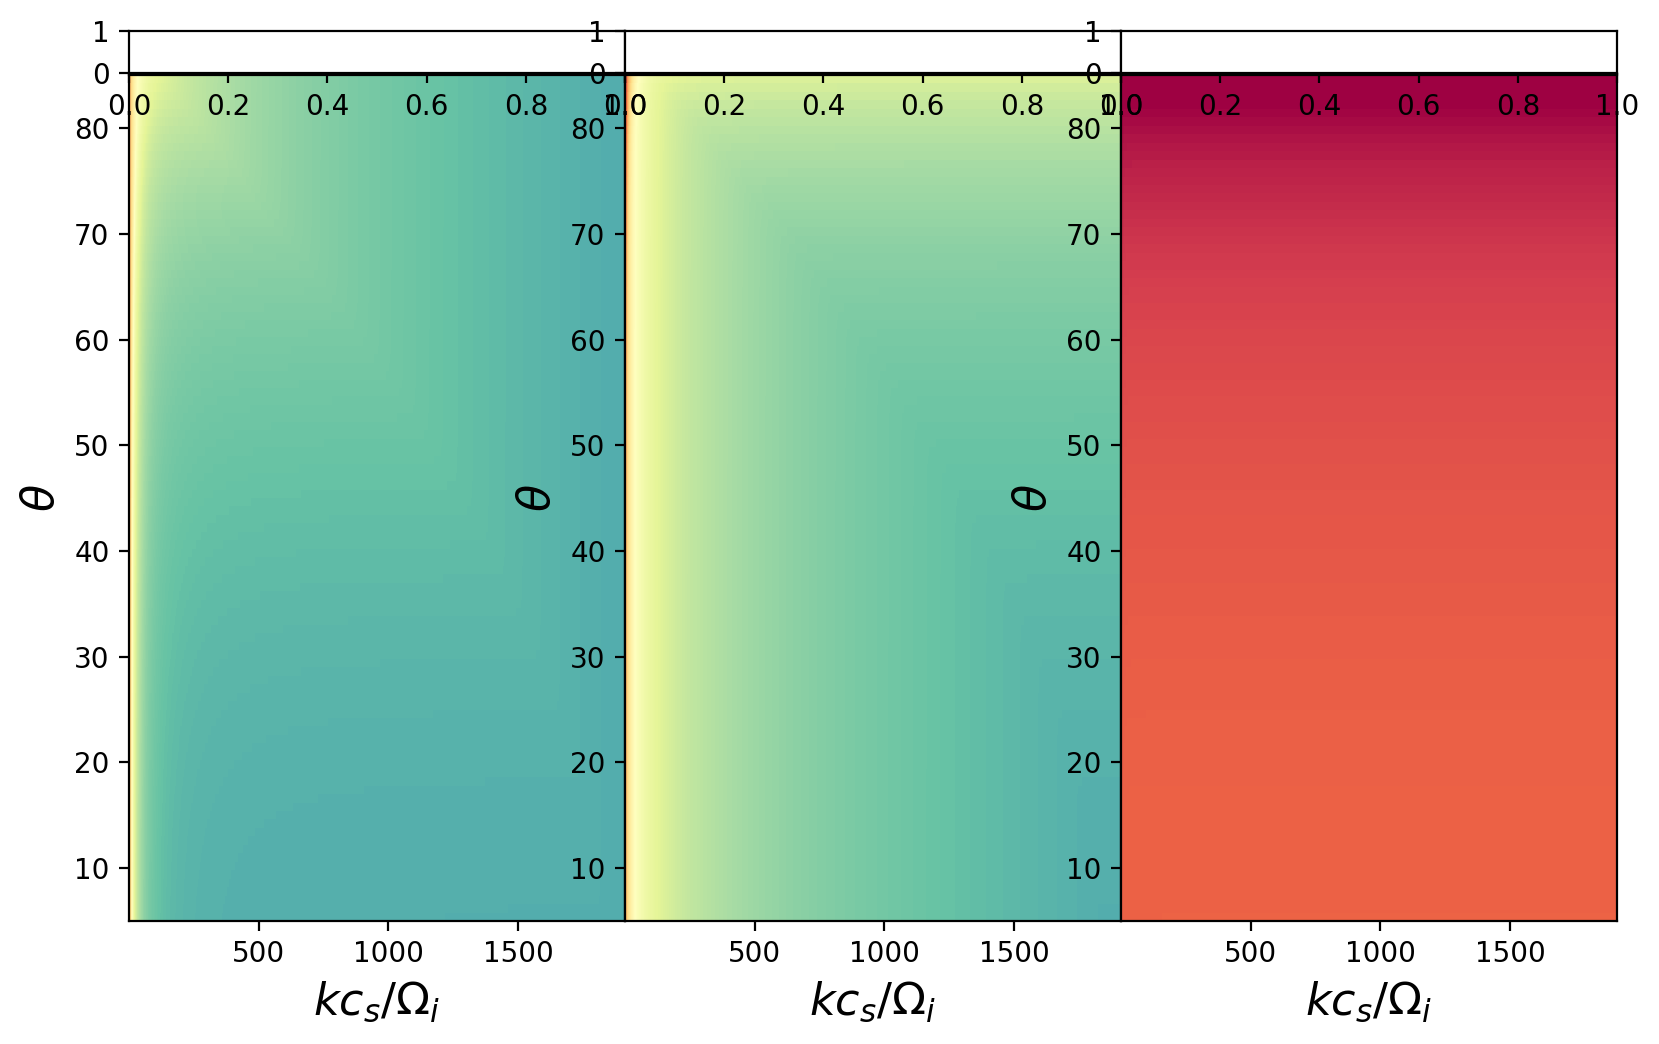

In [196]:

ind = 0
omega_fast     = omega['fast_mode'].value
omega_alfven   = omega['alfven_mode'].value
omega_acoustic = omega['acoustic_mode'].value

k_prime = k * c_s/omega_ci
thetav,kv = np.meshgrid(theta,k)

fig = plt.figure( num=None, figsize=(8, 5), dpi=200, facecolor='w', edgecolor='gray' )
fig.subplots_adjust( left=0.05, right=0.98, top=0.94, bottom=0.05, 
wspace=0., hspace=0. )

axs1 = fig.add_subplot( 1, 3, 1 )
im1 = axs1.imshow(np.transpose(omega_fast), aspect='auto', origin='lower', extent=[np.min(k_prime.value), np.max(k_prime.value), np.min(theta.value), np.max(theta.value)], interpolation=None, cmap=plt.cm.Spectral, norm=colors.LogNorm(vmin=1.e-1, vmax=1.e4))

axs2 = fig.add_subplot( 1, 3, 2 )
im2 = axs2.imshow(np.transpose(omega_alfven), aspect='auto', origin='lower', extent=[np.min(k_prime.value), np.max(k_prime.value), np.min(theta.value), np.max(theta.value)], interpolation=None, cmap=plt.cm.Spectral, norm=colors.LogNorm(vmin=1.e-1, vmax=1.e4))

axs3 = fig.add_subplot( 1, 3, 3 )
im3 = axs3.imshow(np.transpose(omega_acoustic), aspect='auto', origin='lower', extent=[np.min(k_prime.value), np.max(k_prime.value), np.min(theta.value), np.max(theta.value)], interpolation=None, cmap=plt.cm.Spectral, norm=colors.LogNorm(vmin=1.e-1, vmax=1.e4))

axes = [axs1, axs2, axs3]
ims = [im1, im2, im3]

for (axx,im) in zip(axes, ims):
    axx.set_xscale('linear')
    axx.set_xlabel(r'$kc_s/\Omega_i$', fontsize=16)
    axx.set_ylabel(r'$\theta$', fontsize=16)

    divider = make_axes_locatable(axx)
    caxx = divider.append_axes("top", size="5%", pad=0.01 )
    cbar = plt.colorbar( im, cax=cax, orientation='horizontal', ticks=None, 
           fraction=0.05, pad=0.0 )

    cbar.ax.tick_params( axis='x', direction='in', pad=0.0, labeltop=True,
                     labelbottom=False, color='k', top=True, bottom=False )
    cbar.ax.xaxis.set_label_position('top')

    cbar.set_label( r'$\omega/\Omega_{ci}$', fontsize=12, labelpad=2.50 )
#axs.legend(loc='best', markerscale=5, fontsize=14)

#print('omega_fast=%s,%s' %(np.nanmin(omega_fast), np.nanmax(omega_fast)))
#print('omega_alfven=%s,%s' %(np.nanmin(omega_alfven), np.nanmax(omega_alfven)))
#print('omega_acoustic=%s,%s' %(np.nanmin(omega_acoustic), np.nanmax(omega_acoustic)))


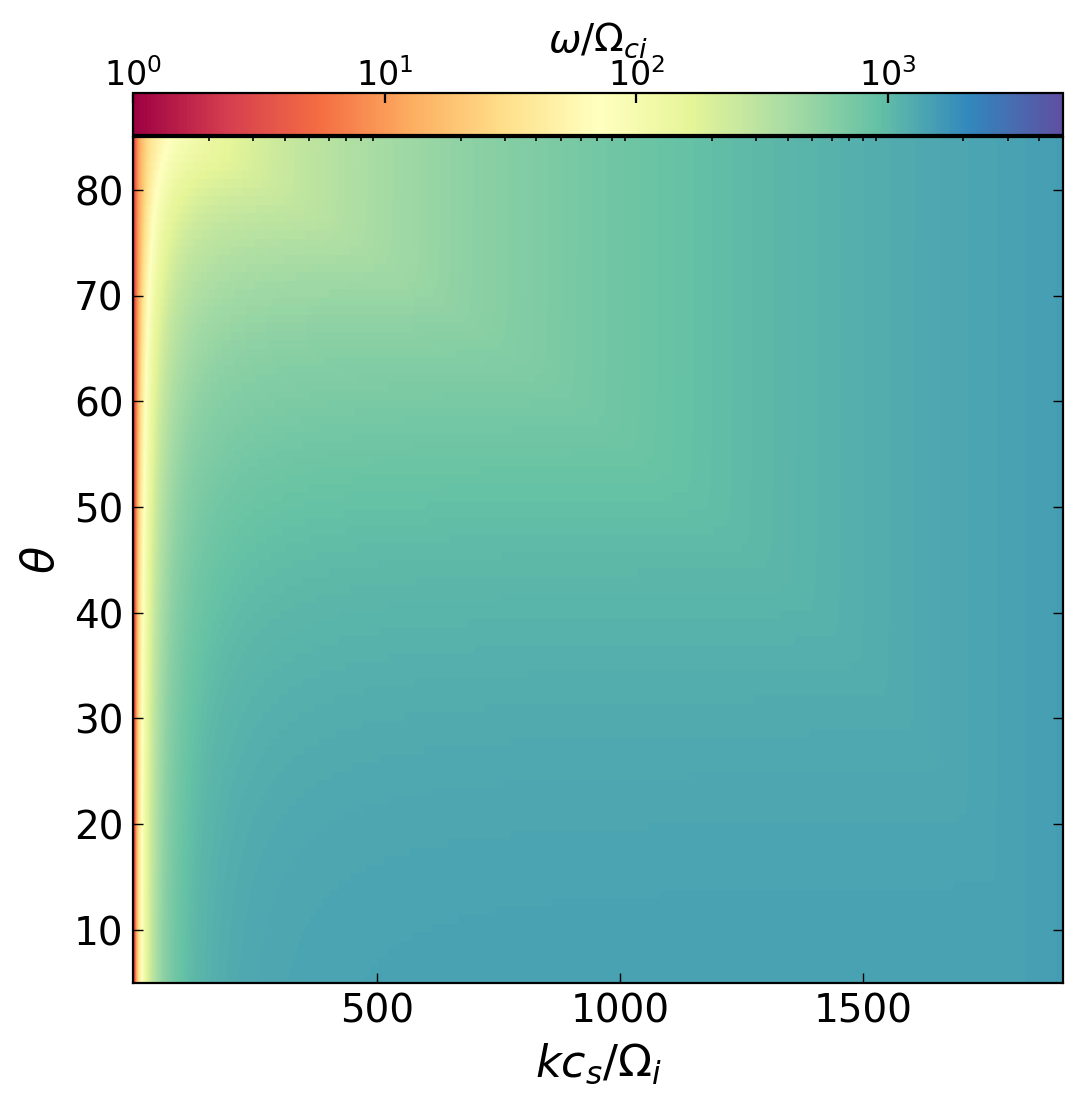

In [227]:

omega_fast     = omega['fast_mode'].value
omega_alfven   = omega['alfven_mode'].value
omega_acoustic = omega['acoustic_mode'].value

k_prime = k * c_s/omega_ci

fig = plt.figure( num=None, figsize=(5, 5), dpi=200, facecolor='w', edgecolor='gray' )
fig.subplots_adjust( left=0.05, right=0.98, top=0.94, bottom=0.05, 
wspace=0., hspace=0. )

axs = fig.add_subplot( 1, 1, 1 )
im = axs.imshow(np.transpose(omega_fast), aspect='auto', origin='lower', extent=[np.min(k_prime.value), np.max(k_prime.value), np.min(theta.value), np.max(theta.value)], interpolation=None, cmap=plt.cm.Spectral, norm=colors.LogNorm(vmin=1.e0, vmax=5.e3))

axs.set_xscale('linear')
axs.set_xlabel(r'$kc_s/\Omega_i$', fontsize=16)
axs.set_ylabel(r'$\theta$', fontsize=16)

axs.get_xaxis().set_tick_params( which='both', direction='in',
labelbottom=True, bottom=True, width=.5, labelsize=14, labelrotation=0 )

axs.get_yaxis().set_tick_params( which='both', direction='in',
labelbottom=True, bottom=True, left=True, right=True, width=.5, labelsize=14, labelrotation=0 )

divider = make_axes_locatable(axs)
cax = divider.append_axes("top", size="5%", pad=0.01 )
cbar = plt.colorbar( im, cax=cax, orientation='horizontal', ticks=None, 
       fraction=0.05, pad=0.0 )
cbar.ax.tick_params( axis='x', direction='in', pad=0.0, labeltop=True,
                     labelbottom=False, color='k', top=True, bottom=False,
                     labelsize=12 )
cbar.ax.xaxis.set_label_position('top')

cbar.set_label( r'$\omega/\Omega_{ci}$', fontsize=14, labelpad=2.50 )


In [200]:
np.nanmin(omega_fast), np.nanmax(omega_fast), np.nanmedian(omega_fast)

(0.01522546567760633, 1520.6533972050916, 1152.7787115792655)

In [67]:
nx, ny = (4, 1)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)
print(xv)
print(yv)

[[0.         0.33333333 0.66666667 1.        ]]
[[0. 0. 0. 0.]]


In [70]:
yv*xv + xv

array([[0.        , 0.33333333, 0.66666667, 1.        ]])

In [53]:
xv*yv

array([[0.        , 0.        , 0.        ],
       [0.        , 0.16666667, 0.33333333],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 0.5       , 1.        ]])

In [55]:
np.shape(x), np.shape(y), np.shape(xv)

((3,), (4,), (4, 3))

In [28]:
aa = np.einsum('i,j->ij',x,y)

In [30]:
aa

array([[0.49527199, 0.80075184, 0.11664845, 0.49323318, 0.43894249,
        0.15982013],
       [0.32031544, 0.51788348, 0.07544198, 0.31899685, 0.28388453,
        0.10336312],
       [0.20811477, 0.33647831, 0.04901603, 0.20725806, 0.18444495,
        0.0671569 ],
       [0.02430475, 0.03929573, 0.00572435, 0.0242047 , 0.02154046,
        0.00784294]])

In [ ]:
%timeit np.multiply.outer(k, theta).ravel() 